In [ ]:
!pip install stargazer

In [ ]:
# @title Preparations: packages
%%capture
import numpy as np
import pandas as pd
import os
import numpy as np
import scipy.special
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

from operator import attrgetter
from stargazer.stargazer import Stargazer

closing_1st = '2020-03-16'
reopen_1st = '2020-05-11'
closing_2nd = '2020-12-16'
reopen_2nd = '2021-02-01'

In [ ]:
df_c1 = pd.read_csv('data_output.csv')

<ipython-input-2-b2e241521ae6>:14: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv(file, index_col=False)
<ipython-input-2-b2e241521ae6>:14: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv(file, index_col=False)


## Model Specification and sensitivity analysis


In [ ]:
df_c1 = df_c1.fillna(method='ffill')
df_c3 = df_c1[df_c1['date']<pd.to_datetime(closing_2nd)]


# model 1.1: direct comparison
formula7c2 = ('np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_7c2 = sm.ols(formula=formula7c2, data=df_c3).fit(cov_type='cluster', cov_kwds={'groups': df_c3['node_id']})

# model 1.1: direct comparison with interaction
formula7c3 = ('np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_7c3 = sm.ols(formula=formula7c3, data=df_c3).fit(cov_type='cluster', cov_kwds={'groups': df_c3['node_id']})

# model 1.1a: direct comparison with interaction
formula7c3a = ('np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Reopen_Period_2) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_7c3a = sm.ols(formula=formula7c3a, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})

# model 1.1b: direct comparison with interaction
formula7c3b = ('np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + C(Reopen_Period_2) + C(Mechanical_Reopen_Period_2) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_7c3b = sm.ols(formula=formula7c3b, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})

######### do the same thing for max value ####################################
formula8c2 = ('np.log(co2_ppm_max) ~ C(Reopen_Period_1) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_8c2 = sm.ols(formula=formula8c2, data=df_c3).fit(cov_type='cluster', cov_kwds={'groups': df_c3['node_id']})



# direct comparison with interaction
formula8c3 = ('np.log(co2_ppm_max) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_8c3 = sm.ols(formula=formula8c3, data=df_c3).fit(cov_type='cluster', cov_kwds={'groups': df_c3['node_id']})


# direct comparison with interaction
formula8c3a = ('np.log(co2_ppm_max) ~ C(Reopen_Period_1) + C(Reopen_Period_2) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_8c3a = sm.ols(formula=formula8c3a, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})


# direct comparison with interaction
formula8c3b = ('np.log(co2_ppm_max) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + C(Reopen_Period_2) + C(Mechanical_Reopen_Period_2) + temperature_deg_c_max + np.square(temperature_deg_c_max) + num_stud + C(node_id)')
reg_co2_8c3b = sm.ols(formula=formula8c3b, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})




In [ ]:
############## output!!! #######################################
### output 1: base conparison of post-reopen ###################

stargazer = Stargazer([reg_co2_7c2, reg_co2_7c3a, reg_co2_8c2, reg_co2_8c3a])
features_sel = ['C(Reopen_Period_1)[T.True]', 'C(Reopen_Period_2)[T.True]']
stargazer.covariate_order(features_sel)
def pretty(str):
    return str.replace('_',' ')
stargazer.rename_covariates({x:pretty(x) for x in features_sel})

stargazer.show_degrees_of_freedom(False)
# stargazer.cov_names
stargazer

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [ ]:
## output 2: comparison by types ##################################
stargazer = Stargazer([reg_co2_7c3, reg_co2_7c3b, reg_co2_8c3, reg_co2_8c3b])
features_sel = ['C(Reopen_Period_1)[T.True]','C(Mechanical_Reopen_Period_1)[T.True]', 'C(Reopen_Period_2)[T.True]','C(Mechanical_Reopen_Period_2)[T.True]']
stargazer.covariate_order(features_sel)
def pretty(str):
    return str.replace('_',' ')
stargazer.rename_covariates({x:pretty(x) for x in features_sel})

stargazer.show_degrees_of_freedom(False)
# stargazer.cov_names
stargazer

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 255, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 255, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [ ]:
df_c1['Period']

0         Before_closing
1         Before_closing
2         Before_closing
3         Before_closing
4         Before_closing
               ...      
104036        2nd_reopen
104037        2nd_reopen
104038        2nd_reopen
104039        2nd_reopen
104040        2nd_reopen
Name: Period, Length: 104041, dtype: object

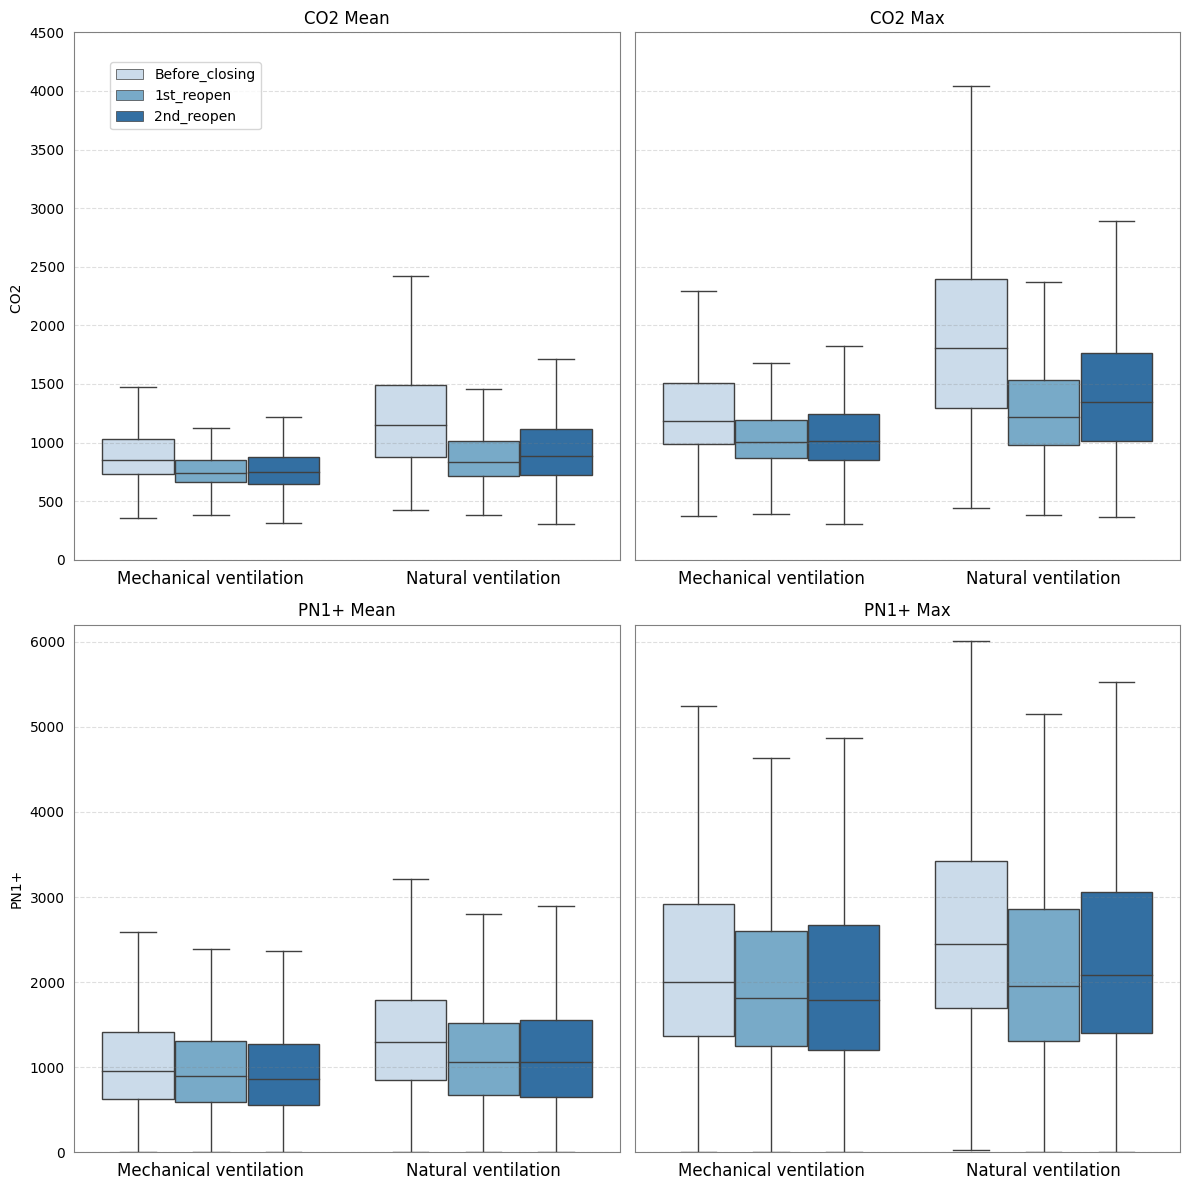

In [ ]:
# Setting up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# List of variables to plot
variables = ["co2_ppm_mean", "co2_ppm_max", "pn1plus_counts_per_l_mean", "pn1plus_counts_per_l_max"]
titles = ["CO2 Mean", "CO2 Max", "PN1+ Mean", "PN1+ Max"]

palette_colors = sns.color_palette("Blues", n_colors=3)

# Mapping the palette to your periods
color_map = {
    "Before_closing": palette_colors[0],  # Light Blue
    "1st_reopen": palette_colors[1],      # Medium Blue
    "2nd_reopen": palette_colors[2]       # Dark Blue
}

for i, (ax, var, title) in enumerate(zip(axes.flat, variables, titles)):
    sns.boxplot(x="Ventilation Type", y=var, hue="Period", data=df_c1,
                palette=color_map,
                showfliers=False, dodge=True, ax=ax, linewidth=1)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels(["Mechanical ventilation", "Natural ventilation"], fontsize=12)

    # Y and X axis label adjustments
    if i % 2 == 0:  # Leftmost plots
        ax.set_ylabel(title[:4])
    else:
        ax.set_ylabel("")
        ax.yaxis.set_ticklabels([])  # Hide y-ticks

    if "co2" in var:
        ax.set_ylim(0, 4500)
    else:
        ax.set_ylim(0, 6200)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.spines['right'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.get_legend().remove()

# Draw one legend outside of the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09, 0.95))

# Adjust the layout
plt.tight_layout()
plt.show()
fig.savefig("boxplot.png", dpi=300, bbox_inches='tight')

In [ ]:
# @title Correlation test
from scipy.stats import pearsonr
selected_columns = [
    "co2_ppm_mean",
    "humidity_pct_mean",
    "pn1plus_counts_per_l_mean",
    "temperature_deg_c_mean",
    "pressure_mbar_mean",
    "sound_dba_mean"
]

# Generate a correlation table using summary_col
correlation_matrix = df_c1[selected_columns].corr()

correlation_matrix

,co2_ppm_mean,humidity_pct_mean,pn1plus_counts_per_l_mean,temperature_deg_c_mean,pressure_mbar_mean,sound_dba_mean
co2_ppm_mean,1.000***,0.105***,0.385***,-0.153***,-0.064***,-0.089***
humidity_pct_mean,0.105***,1.000***,0.114***,0.127***,-0.117***,0.041***
pn1plus_counts_per_l_mean,0.385***,0.114***,1.000***,-0.037***,0.023***,0.080***
temperature_deg_c_mean,-0.153***,0.127***,-0.037***,1.000***,0.059***,0.120***
pressure_mbar_mean,-0.064***,-0.117***,0.023***,0.059***,1.000***,-0.006
sound_dba_mean,-0.089***,0.041***,0.080***,0.120***,-0.006,1.000***


In [ ]:
def compute_correlation(data):
    # Compute the correlation matrix and the p-values matrix
    correlation_matrix = data[selected_columns].corr()
    p_values_matrix = data[selected_columns].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlation_matrix.shape)

    # Annotate the correlation matrix with significance levels
    significant_correlation_matrix = correlation_matrix.applymap('{:.3f}'.format)
    for col in correlation_matrix.columns:
        for idx in correlation_matrix.index:
            if p_values_matrix.loc[idx, col] < 0.01:
                significant_correlation_matrix.loc[idx, col] = f"{correlation_matrix.loc[idx, col]:.3f}***"

    return significant_correlation_matrix

# Compute correlation for "Ventilation Type = Mechanical ventilation"
mechanical_ventilation_data = df_c1[df_c1['Ventilation Type'] == 'Mechanical ventilation']


# Compute correlation for other ventilation types
other_ventilation_data = df_c1[df_c1['Ventilation Type'] != 'Mechanical ventilation']



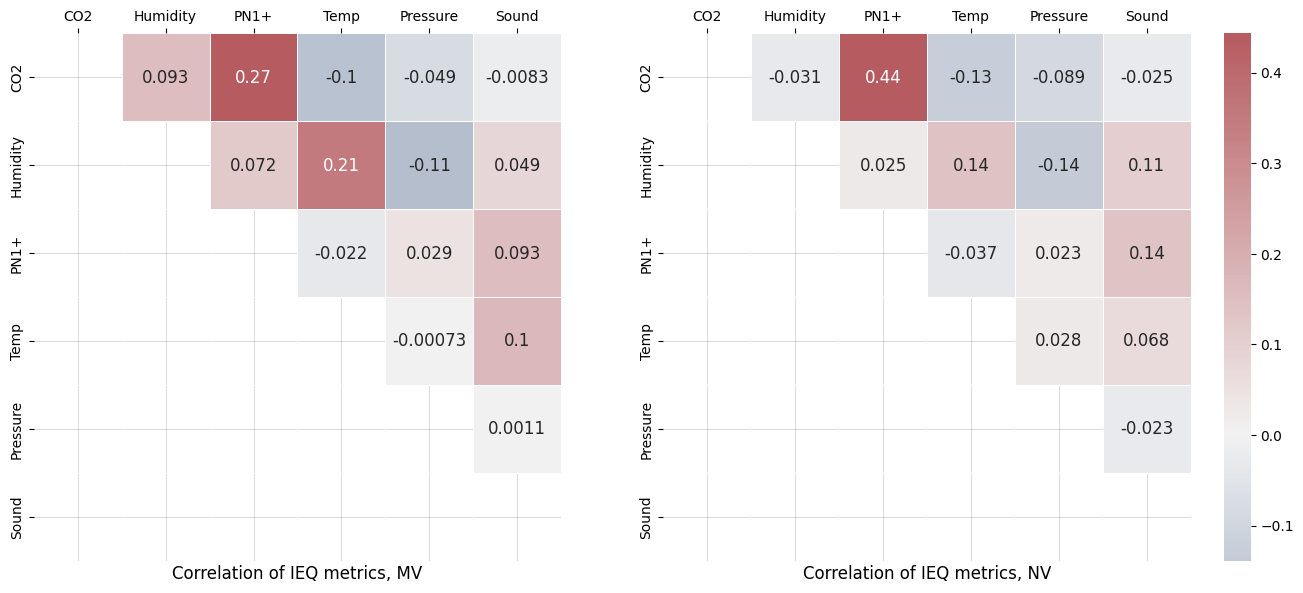

In [ ]:
simplified_names = {
    "co2_ppm_mean": "CO2",
    "humidity_pct_mean": "Humidity",
    "pn1plus_counts_per_l_mean": "PN1+",
    "temperature_deg_c_mean": "Temp",
    "pressure_mbar_mean": "Pressure",
    "sound_dba_mean": "Sound"
}

mechanical_corr = mechanical_ventilation_data[selected_columns].corr()
other_corr = other_ventilation_data[selected_columns].corr()

# Set the diagonal of the correlation matrices to NaN
for df in [mechanical_corr, other_corr]:
    np.fill_diagonal(df.values, np.nan)

# Rename the columns for the correlation matrices
mechanical_corr = mechanical_corr.rename(columns=simplified_names, index=simplified_names)
other_corr = other_corr.rename(columns=simplified_names, index=simplified_names)


# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Custom colormap: -1 is blue, 0 is white, and +1 is red
cmap = sns.diverging_palette(250, 10, s=40, l=50, as_cmap=True)

annot_kws = {'fontsize': 12}
label_fontsize = 10

# Mask for the lower triangle
mask = np.tril(np.ones_like(mechanical_corr, dtype=bool))

for ax in axes:
    ax.hlines(y=np.arange(len(simplified_names) + 1) - .5, xmin=-.5, xmax=len(simplified_names) + .5, color='grey',linewidths=0.5, alpha=0.4, zorder=0)
    ax.vlines(x=np.arange(len(simplified_names) + 1) - .5, ymin=-.5, ymax=len(simplified_names) + .5, color='grey',linewidths=0.5, alpha=0.4, zorder=0)
    ax.set_xticks(np.arange(len(simplified_names)))
    ax.set_yticks(np.arange(len(simplified_names)))
    # ax.grid(which='both', linestyle='-', linewidth='0.5', color='grey', alpha=0.3, zorder=0)

# Heatmap for "Mechanical Ventilation"
# axes[0].grid(which='both', linestyle='-', linewidth='0.5', color='grey', alpha=0.3,zorder=0)

sns.heatmap(mechanical_corr, annot=True,annot_kws=annot_kws, cmap=cmap, center=0, ax=axes[0], cbar=False, square=True, mask=mask,linewidths=0.6, linecolor='white',zorder=1)
axes[0].set_title('Correlation of IEQ metrics, MV',y=-0.05)
axes[0].tick_params(axis='both', which='major', labelsize=label_fontsize)


# Heatmap for "Other Ventilation Types"
# axes[1].grid(which='both', linestyle='-', linewidth='0.5', color='grey', alpha=0.3,zorder=0)

sns.heatmap(other_corr, annot=True,annot_kws=annot_kws, cmap=cmap, center=0, ax=axes[1], square=True, mask=mask,linewidths=0.6, linecolor='white',zorder=1)
axes[1].set_title('Correlation of IEQ metrics, NV',y=-0.05)
axes[1].tick_params(axis='both', which='major', labelsize=label_fontsize)


# Move the horizontal variable names to the top
for ax in axes:
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

fig.savefig("correlation.png", dpi=300, bbox_inches='tight')


In [ ]:
print(other_corr.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       CO2 &  Humidity &      PN1+ &      Temp &  Pressure &     Sound \\
\midrule
CO2      &       NaN & -0.031383 &  0.443131 & -0.128835 & -0.089202 & -0.025345 \\
Humidity & -0.031383 &       NaN &  0.025193 &  0.140506 & -0.139031 &  0.105847 \\
PN1+     &  0.443131 &  0.025193 &       NaN & -0.036993 &  0.023320 &  0.138051 \\
Temp     & -0.128835 &  0.140506 & -0.036993 &       NaN &  0.028417 &  0.067675 \\
Pressure & -0.089202 & -0.139031 &  0.023320 &  0.028417 &       NaN & -0.023296 \\
Sound    & -0.025345 &  0.105847 &  0.138051 &  0.067675 & -0.023296 &       NaN \\
\bottomrule
\end{tabular}



<ipython-input-14-d919ddc9c54c>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(other_corr.to_latex())


This table shows Pearson correlation coefficients for the daily peak averages of our set of indoor environmental quality parameters at different levels of aggregation. Panel A aggregates data at the School and learning period levels; Panel B aggregates data at the classroom and learning period levels; and Panel C aggregates data at the student and learning period levels.

The CO2 levels in a class- room can be correlated with other selected indoor environmental quality parameters that were included in the regression model as controls (see Table A.1 for the correlation matrix of environmental factors included within our study).

In [ ]:
# Sensitivity of Effects of mechanical ventilation
additional_vars = ["temperature_deg_c_max", "np.square(temperature_deg_c_max)", "num_stud", "pressure_mbar_mean", "humidity_pct_mean", "pn1plus_counts_per_l_mean"]

base_formula = "np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + C(node_id)"
formulas = []
models = []

# Start with the base model
models.append(sm.ols(base_formula, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']}))
formulas.append(base_formula)

# Add additional variables incrementally
for var in additional_vars:
    formula = base_formula + f" + {var}"
    model = sm.ols(formula, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})
    # results.append((model.params["C(Reopen_Period_1)[T.True]"], model.params["C(Mechanical_Reopen_Period_1)[T.True]"]))
    models.append(model)
    formulas.append(formula)
    base_formula = formula

# df_results = pd.DataFrame(results, columns=["C(Reopen_Period_1)", "C(Mechanical_Reopen_Period_1)"]).T
# # df_results.columns = ["Model1", "Model2", "Model3", "Model4", "Model5", "Model6", "Model7", "Model8"]
# df_results


In [ ]:
stargazer = Stargazer(models)
features_sel = ['C(Reopen_Period_1)[T.True]','C(Mechanical_Reopen_Period_1)[T.True]']
stargazer.covariate_order(features_sel)
def pretty(str):
    return str.replace('_',' ')
stargazer.rename_covariates({x:pretty(x) for x in features_sel})

stargazer.show_degrees_of_freedom(False)
# stargazer.cov_names
stargazer

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 250, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 251, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr

In [ ]:
# Sensitivity of Effects of mechanical ventilation
additional_vars = ["C(node_id)","temperature_deg_c_max", "np.square(temperature_deg_c_max)", "num_stud", "pressure_mbar_mean", "humidity_pct_mean", "pn1plus_counts_per_l_mean"]

base_formula = "np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + C(Reopen_Period_2) + C(Mechanical_Reopen_Period_2)"
formulas = []
models = []

# Start with the base model
models.append(sm.ols(base_formula, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']}))
formulas.append(base_formula)

# Add additional variables incrementally
for var in additional_vars:
    formula = base_formula + f" + {var}"
    model = sm.ols(formula, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})
    # results.append((model.params["C(Reopen_Period_1)[T.True]"], model.params["C(Mechanical_Reopen_Period_1)[T.True]"]))
    models.append(model)
    formulas.append(formula)
    base_formula = formula

In [ ]:
stargazer = Stargazer(models)
features_sel = ['C(Reopen_Period_1)[T.True]','C(Mechanical_Reopen_Period_1)[T.True]','C(Reopen_Period_2)[T.True]','C(Mechanical_Reopen_Period_2)[T.True]']
stargazer.covariate_order(features_sel)
def pretty(str):
    return str.replace('_',' ')
stargazer.rename_covariates({x:pretty(x) for x in features_sel})

stargazer.show_degrees_of_freedom(False)
# stargazer.cov_names
stargazer

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 252, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 253, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 254, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 255, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr

In [ ]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{8}{c}{\textit{Dependent variable: np.log(co2_ppm_mean)}} \
\cr \cline{2-9}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\
\hline \\[-1.8ex]
 C(Reopen Period 1)[T.True] & -0.087$^{***}$ & -0.298$^{***}$ & -0.298$^{***}$ & -0.293$^{***}$ & -0.290$^{***}$ & -0.290$^{***}$ & -0.290$^{***}$ & -0.276$^{***}$ \\
& (0.024) & (0.019) & (0.020) & (0.019) & (0.020) & (0.020) & (0.020) & (0.020) \\
 C(Mechanical Reopen Period 1)[T.True] & -0.119$^{***}$ & 0.135$^{***}$ & 0.140$^{***}$ & 0.136$^{***}$ & 0.132$^{***}$ & 0.132$^{***}$ & 0.132$^{***}$ & 0.125$^{***}$ \\
& (0.029) & (0.023) & (0.023) & (0.023) & (0.023) & (0.023) & (0.023) & (0.022) \\
 C(Reopen Period 2)[T.True] & -0.037$^{}$ & -0.242$^{***}$ & -0.242$^{***}$ & -0.234$^{***}$ & -0.231$^{***}$ & -0.230$^{***}$ & -0.231$^{***}$ & -0.218$^{***}$ \\
& (0.027) & (0.019) & (0.019) & (0.019) & (0.021

In [ ]:
df_c1.columns

Index(['date', 'co2_ppm_mean', 'co2_ppm_max', 'humidity_pct_mean',
       'humidity_pct_max', 'pn1plus_counts_per_l_mean',
       'pn1plus_counts_per_l_max', 'pressure_mbar_mean', 'pressure_mbar_max',
       'sound_dba_mean', 'sound_dba_max', 'temperature_deg_c_mean',
       'temperature_deg_c_max', 'node_id', 'schoolyear', 'town_code',
       'floor_num', 'group', 'num_stud', 'year', 'school_name', 'ventilation',
       'ventilation_bi', 'month', 'season', 'weekday', 'covid', 'holidays',
       'Reopen_Period_1', 'Reopen_Period_2', 'Before_Closing',
       'Mechanical_Reopen_Period_1', 'Mechanical_Reopen_Period_2',
       'Mechanical_Before_Closing', 'n_month_before_1st_closing',
       'n_month_after_1st_reopen', 'n_month_after_2nd_reopen', 'Period',
       'Observation Period', 'Ventilation Type', 'Mechanical_1st_reopen',
       'Mechanical_2nd_reopen', 'Mechanical_Before_closing', 'temp_seg',
       'num_stud_standard'],
      dtype='object')

In [ ]:
df_c1['log_co2_ppm_mean'] = np.log(df_c1['co2_ppm_mean'])
df_c1['temperature_deg_c_max_squared'] = np.square(df_c1['temperature_deg_c_max'])


In [ ]:
# List of model specifications
import itertools
additional_vars = ["num_stud","temperature_deg_c_max", "np.square(temperature_deg_c_max)","temperature_deg_c_mean", "sound_dba_mean", "pressure_mbar_mean", "humidity_pct_mean"]

base_formula = "np.log(co2_ppm_mean) ~ C(Reopen_Period_1) + C(Mechanical_Reopen_Period_1) + C(Reopen_Period_2) + C(Mechanical_Reopen_Period_2) + C(node_id)"
specs = []

for r in range(1, len(additional_vars) + 1):
    # Generate combinations for the current length
    for combination in itertools.combinations(additional_vars, r):
        # Create the formula using the current combination of variables
        formula = base_formula + " + " + " + ".join(combination)
        specs.append(formula)


In [ ]:
len(specs)

127

In [ ]:
# Placeholder for results
coefficients = []

lower_ci = []
upper_ci = []

coefficients_2 = []
lower_ci_2 = []
upper_ci_2 = []

coefficients_3 = []
lower_ci_3 = []
upper_ci_3 = []

coefficients_4 = []
lower_ci_4 = []
upper_ci_4 = []

controls_used = []

# Run each model specification
for spec in specs:
    model = sm.ols(formula=spec, data=df_c1).fit(cov_type='cluster', cov_kwds={'groups': df_c1['node_id']})

    coef = model.params['C(Reopen_Period_1)[T.True]']
    conf_int = model.conf_int().loc['C(Reopen_Period_1)[T.True]']

    coefficients.append(coef)
    lower_ci.append(conf_int[0])
    upper_ci.append(conf_int[1])

    coef_2 = model.params['C(Mechanical_Reopen_Period_1)[T.True]']
    conf_int_2 = model.conf_int().loc['C(Mechanical_Reopen_Period_1)[T.True]']

    coefficients_2.append(coef_2)
    lower_ci_2.append(conf_int_2[0])
    upper_ci_2.append(conf_int_2[1])

    coef_3 = model.params['C(Reopen_Period_2)[T.True]']
    conf_int_3 = model.conf_int().loc['C(Reopen_Period_2)[T.True]']

    coefficients_3.append(coef_3)
    lower_ci_3.append(conf_int_3[0])
    upper_ci_3.append(conf_int_3[1])

    coef_4 = model.params['C(Mechanical_Reopen_Period_2)[T.True]']
    conf_int_4 = model.conf_int().loc['C(Mechanical_Reopen_Period_2)[T.True]']

    coefficients_4.append(coef_4)
    lower_ci_4.append(conf_int_4[0])
    upper_ci_4.append(conf_int_4[1])

    # Extract control variables used in this specification (exclude the main predictors)
    controls_in_spec = [var for var in model.model.exog_names if var not in ["Intercept", "C(Reopen_Period_1)[T.True]","C(Reopen_Period_2)[T.True]","C(Mechanical_Reopen_Period_1)[T.True]","C(Mechanical_Reopen_Period_2)[T.True]"] and not var.startswith('C(')]
    controls_used.append(controls_in_spec)

In [ ]:
# sorted_indices = np.argsort(coefficients)

# # Reorder coefficients, errors, and controls used
# coefficients = [coefficients[i] for i in sorted_indices]
# lower_errors = [lower_errors[i] for i in sorted_indices]
# upper_errors = [upper_errors[i] for i in sorted_indices]
# controls_used = [controls_used[i] for i in sorted_indices]

x_values_1 = [x - 0.1 for x in range(len(specs))]
x_values_2 = [x + 0.1 for x in range(len(specs))]
x_values_3 = [x + 0.1 for x in range(len(specs))]
x_values_3 = [x + 0.1 for x in range(len(specs))]

lower_errors = [coef - lci for coef, lci in zip(coefficients, lower_ci)]
upper_errors = [uci - coef for uci, coef in zip(upper_ci, coefficients)]

lower_errors_2 = [coef - lci for coef, lci in zip(coefficients_2, lower_ci_2)]
upper_errors_2 = [uci - coef for uci, coef in zip(upper_ci_2, coefficients_2)]

lower_errors_3 = [coef - lci for coef, lci in zip(coefficients_3, lower_ci_3)]
upper_errors_3 = [uci - coef for uci, coef in zip(upper_ci_3, coefficients_3)]

lower_errors_4 = [coef - lci for coef, lci in zip(coefficients_4, lower_ci_4)]
upper_errors_4 = [uci - coef for uci, coef in zip(upper_ci_4, coefficients_4)]

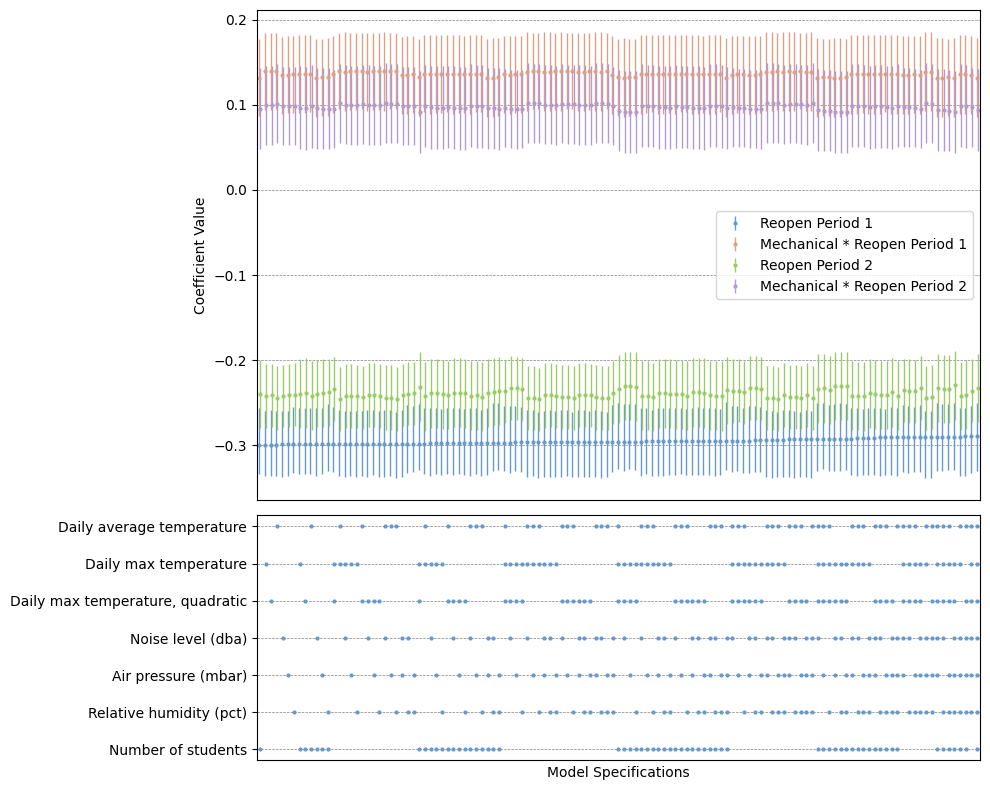

In [ ]:
grey_blue = '#6699CC'



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

# Adjust font size for upper plot
ax1.errorbar(x_values_1, coefficients, yerr=[lower_errors, upper_errors], fmt='o', color='#6699CC', label="Reopen Period 1",markersize=2, linewidth=1)
ax1.errorbar(x_values_1, coefficients_2, yerr=[lower_errors_2, upper_errors_2], fmt='o', color='#DD9F88', label="Mechanical * Reopen Period 1",markersize=2,linewidth=1)
ax1.errorbar(x_values_2, coefficients_3, yerr=[lower_errors_3, upper_errors_3], fmt='o', color='#99CC66', label="Reopen Period 2",markersize=2,linewidth=1)
ax1.errorbar(x_values_2, coefficients_4, yerr=[lower_errors_4, upper_errors_4], fmt='o', color='#B499CC', label="Mechanical * Reopen Period 2",markersize=2,linewidth=1)
ax1.legend()
ax1.set_ylabel("Coefficient Value", fontsize=10)
ax1.set_xlim(-0.5, len(specs) - 0.5)  # Adjusting x limits to fully display the error bars
# ax1.set_ylim(-0.4, -0.2)  # Setting y limits to -1 and 1
ax1.set_xticks([])  # Remove x-ticks
ax1.set_xticklabels([])  # Remove x-tick labels
ax1.tick_params(axis='both', labelsize=10)

# Adjust font size for lower plot
# all_controls = sorted(list(set([item for sublist in controls_used for item in sublist if not item.startswith('C(node_id)[')])))
all_controls = [ 'num_stud',
'humidity_pct_mean',
 'pressure_mbar_mean',
 'sound_dba_mean',
 'np.square(temperature_deg_c_max)',
 'temperature_deg_c_max',
 'temperature_deg_c_mean']

for i, spec_controls in enumerate(controls_used):
    for control in spec_controls:
        ax2.plot(i, all_controls.index(control), 'o', color=grey_blue,markersize=2)

ax2.set_xlim(-0.5, len(specs) - 0.5)  # Adjusting x limits to fully display the error bars
ax2.set_xticks([])  # Remove x-ticks
ax2.set_xticklabels([])  # Remove x-tick labels
ax2.set_yticks(range(len(all_controls)))
ax2.set_yticklabels(all_controls, fontsize=10)
ax2.set_xlabel("Model Specifications", fontsize=10)
ax2.tick_params(axis='both', labelsize=10)

custom_labels = ["Number of students", "Relative humidity (pct)", "Air pressure (mbar)", "Noise level (dba)", "Daily max temperature, quadratic", "Daily max temperature", "Daily average temperature"]
ax2.set_yticklabels(custom_labels)

# For the upper plot (ax1):
ax1.grid(which='both', axis='y', linestyle='--', linewidth=0.5, color='grey')

# For the lower plot (ax2):
ax2.grid(which='both', axis='y', linestyle='--', linewidth=0.5, color='grey')

plt.tight_layout()
plt.show()

fig.savefig("specification.png", dpi=300, bbox_inches='tight')

In [ ]:
all_controls

['C(Mechanical_Reopen_Period_2)[T.True]',
 'C(Reopen_Period_2)[T.True]',
 'np.square(temperature_deg_c_max)',
 'num_stud',
 'temperature_deg_c_max']

In [ ]:
spec_controls

['C(Reopen_Period_2)[T.True]',
 'C(Mechanical_Reopen_Period_2)[T.True]',
 'C(node_id)[T.000c10]',
 'C(node_id)[T.000c12]',
 'C(node_id)[T.000c16]',
 'C(node_id)[T.000c20]',
 'C(node_id)[T.000c2c]',
 'C(node_id)[T.000c3c]',
 'C(node_id)[T.000c3e]',
 'C(node_id)[T.000c62]',
 'C(node_id)[T.000c64]',
 'C(node_id)[T.000c66]',
 'C(node_id)[T.000c68]',
 'C(node_id)[T.000c6a]',
 'C(node_id)[T.000c6c]',
 'C(node_id)[T.000c6e]',
 'C(node_id)[T.000c70]',
 'C(node_id)[T.000c72]',
 'C(node_id)[T.000c74]',
 'C(node_id)[T.000c76]',
 'C(node_id)[T.000c7a]',
 'C(node_id)[T.000c7c]',
 'C(node_id)[T.000c80]',
 'C(node_id)[T.000c88]',
 'C(node_id)[T.000c8e]',
 'C(node_id)[T.000c92]',
 'C(node_id)[T.000c94]',
 'C(node_id)[T.000c96]',
 'C(node_id)[T.000c98]',
 'C(node_id)[T.000c9a]',
 'C(node_id)[T.000c9e]',
 'C(node_id)[T.000ca0]',
 'C(node_id)[T.000ca2]',
 'C(node_id)[T.000ca6]',
 'C(node_id)[T.000cac]',
 'C(node_id)[T.000cae]',
 'C(node_id)[T.000cb2]',
 'C(node_id)[T.000cb4]',
 'C(node_id)[T.000cb6]',
 '

In [ ]:
def get_period(num_month, n, prefix):
    if num_month >= 0:
        return prefix + str(num_month//n+1) + '_periods'
    else:
        return 'pre'

def get_period_d(num_days, n, prefix):
    if num_days >= 0:
        return prefix + str(num_days//n+1) + '_periods'
    else:
        return 'pre'
df_c1['period_0']= df_c1['n_month_before_1st_closing'].apply(lambda x: get_period(x,3,'before_1st_'))
df_c1['period_1'] = df_c1['n_month_after_1st_reopen'].apply(lambda x: get_period(x,3,'after_1st_'))
df_c1['period_2']= df_c1['n_month_after_2nd_reopen'].apply(lambda x: get_period(x,3,'after_2nd_'))


df_c1.loc[df_c1['date']>=pd.to_datetime(reopen_2nd),'period_1'] = df_c1.loc[df_c1['date']>=pd.to_datetime(reopen_2nd),'period_2']

df_c1[['date','n_month_after_2nd_reopen','period_1']]
# df_c1[df_c1['date']==pd.to_datetime('2022-07-01')][['date','n_month_after_2nd_reopen','period_1']]



df_period_dummy = pd.get_dummies(df_c1['period_1'])

df_period_ventilation_dummy =df_period_dummy.copy()


df_period_ventilation_dummy.loc[df_output1['ventilation_bi']==0, :]=0

df_period_ventilation_dummy.columns = ['Mech_'+str(x) for x in df_period_ventilation_dummy.columns.tolist() ]

df_dy = pd.concat([df_c1,df_period_dummy, df_period_ventilation_dummy], axis = 1)



dummies = ['after_1st_1_periods', 'after_1st_2_periods', 'after_1st_3_periods','after_2nd_1_periods', 'after_2nd_2_periods', 'after_2nd_3_periods', 'after_2nd_4_periods', 'after_2nd_5_periods', 'after_2nd_6_periods','Mech_after_1st_1_periods', 'Mech_after_1st_2_periods','Mech_after_1st_3_periods', 'Mech_after_2nd_1_periods','Mech_after_2nd_2_periods', 'Mech_after_2nd_3_periods', 'Mech_after_2nd_4_periods', 'Mech_after_2nd_5_periods','Mech_after_2nd_6_periods']


formula1da = ('np.log(co2_ppm_mean) ~ {0}  + num_stud + C(node_id)+ C(season)'.format('+'.join(['C({0})'.format(str) for str in dummies])))

reg_co2_1da = sm.ols(formula=formula1da, data=df_dy).fit(cov_type='cluster', cov_kwds={'groups': df_dy['node_id']})







In [ ]:
# @title Model specification plot and sensitivity analysis

In [ ]:
reg_co2_1da.bse

Intercept                      0.042052
C(after_1st_1_periods)[T.1]    0.021846
C(after_1st_2_periods)[T.1]    0.023174
C(after_1st_3_periods)[T.1]    0.022096
C(after_2nd_1_periods)[T.1]    0.020633
                                 ...   
C(node_id)[T.00331e]           0.016424
C(season)[T.2]                 0.005228
C(season)[T.3]                 0.010534
C(season)[T.4]                 0.005067
num_stud                       0.001568
Length: 271, dtype: float64

In [ ]:
features_sel = ['C({0})[T.1]'.format(str) for str in dummies]


df_plot_dynamic0 = pd.DataFrame()
k = 9
df_plot_dynamic0['Daily average CO2 change'] = [(a, b) for a, b in zip(reg_co2_1da.params[features_sel][:k].round(2), reg_co2_1da.bse[features_sel][:k].round(2))]

# df_plot_dynamic = df_plot_dynamic.reset_index()


# reg_co2_2da.params[features_sel][:k].values
mec_coef = reg_co2_1da.params[features_sel][:k].values.round(2) + reg_co2_1da.params[features_sel][k:].values.round(2)
# mec_coef = reg_co2_1da.params[features_sel][k:].values.round(2)
df_plot_dynamic0['Daily average CO2 change with mechanical ventilation'] = [(a, b) for a, b in zip(mec_coef, reg_co2_1da.bse[features_sel][k:].round(2))]

df_plot_dynamic0['date'] = ['2020-06-01','2020-09-01','2020-12-01','2021-03-01','2021-06-01','2021-09-01','2021-12-01','2022-03-01','2022-06-01']
df_plot_dynamic0['date'] = pd.to_datetime(df_plot_dynamic0['date'])
df_plot_dynamic0 = df_plot_dynamic0.reset_index(drop=True)
df_plot_dynamic0

,Daily average CO2 change,Daily average CO2 change with mechanical ventilation,date
0,"(-0.27, 0.02)","(-0.09000000000000002, 0.03)",2020-06-01
1,"(-0.29, 0.02)","(-0.16999999999999998, 0.03)",2020-09-01
2,"(-0.18, 0.02)","(-0.09, 0.03)",2020-12-01
3,"(-0.16, 0.02)","(-0.1, 0.02)",2021-03-01
4,"(-0.25, 0.02)","(-0.09, 0.03)",2021-06-01
5,"(-0.23, 0.02)","(-0.16, 0.03)",2021-09-01
6,"(-0.17, 0.03)","(-0.13, 0.03)",2021-12-01
7,"(-0.21, 0.02)","(-0.13, 0.03)",2022-03-01
8,"(-0.3, 0.03)","(-0.15, 0.03)",2022-06-01


In [ ]:
df_period_dummy1 = pd.get_dummies(df_c1['period_0'])

df_period_ventilation_dummy1 =df_period_dummy1.copy()


df_period_ventilation_dummy1.loc[df_output1['ventilation_bi']==0, :]=0

df_period_ventilation_dummy1.columns = ['Mech_'+str(x) for x in df_period_ventilation_dummy1.columns.tolist() ]

df_dy1 = pd.concat([df_c1,df_period_dummy1, df_period_ventilation_dummy1], axis = 1)

In [ ]:
dummies1 = ['before_1st_2_periods', 'before_1st_3_periods',
       'before_1st_4_periods', 'before_1st_5_periods',
       #'Mech_before_1st_1_periods',
            'Mech_before_1st_2_periods',
       'Mech_before_1st_3_periods', 'Mech_before_1st_4_periods',
       'Mech_before_1st_5_periods']
formula1da1 = ('np.log(co2_ppm_mean) ~ {0}  + num_stud + C(node_id)+ C(season)'.format('+'.join(['C({0})'.format(str) for str in dummies1])))

reg_co2_1da1 = sm.ols(formula=formula1da1, data=df_dy1).fit(cov_type='cluster', cov_kwds={'groups': df_dy['node_id']})

features_sel1 = ['C({0})[T.1]'.format(str) for str in dummies1]


In [ ]:
reg_co2_1da1.params[features_sel1]

C(before_1st_2_periods)[T.1]         0.252901
C(before_1st_3_periods)[T.1]         0.082096
C(before_1st_4_periods)[T.1]         0.174726
C(before_1st_5_periods)[T.1]         0.250552
C(Mech_before_1st_2_periods)[T.1]   -0.103749
C(Mech_before_1st_3_periods)[T.1]   -0.034991
C(Mech_before_1st_4_periods)[T.1]   -0.081469
C(Mech_before_1st_5_periods)[T.1]   -0.159845
dtype: float64

In [ ]:
reg_co2_1da1.bse[features_sel1]

C(before_1st_2_periods)[T.1]         0.025416
C(before_1st_3_periods)[T.1]         0.025730
C(before_1st_4_periods)[T.1]         0.021612
C(before_1st_5_periods)[T.1]         0.030235
C(Mech_before_1st_2_periods)[T.1]    0.028888
C(Mech_before_1st_3_periods)[T.1]    0.027642
C(Mech_before_1st_4_periods)[T.1]    0.024950
C(Mech_before_1st_5_periods)[T.1]    0.034505
dtype: float64

In [ ]:
df_plot_dynamic1 = pd.DataFrame()
k = 4
coef = [0]+list(reg_co2_1da1.params[features_sel1].values.round(2))
bse = ['Baseline']+list(reg_co2_1da1.bse[features_sel1].values.round(2))
df_plot_dynamic1['Daily average CO2 change'] = [(a, b) for a, b in zip(coef[:k+1], bse[:k+1])]

mec_coef = [0]+ list(reg_co2_1da1.params[features_sel1][k:].values.round(2))
mec_coef = np.array(mec_coef) + np.array(coef[:k+1])
mec_bse = ['Baseline']+list(bse[k+1:])
df_plot_dynamic1['Daily average CO2 change with mechanical ventilation'] = [(a, b) for a, b in zip(list(mec_coef), mec_bse)]

df_plot_dynamic1 = df_plot_dynamic1.round(2)
df_plot_dynamic1

,Daily average CO2 change,Daily average CO2 change with mechanical ventilation
0,"(0, Baseline)","(0.0, Baseline)"
1,"(0.25, 0.03)","(0.15, 0.03)"
2,"(0.08, 0.03)","(0.05, 0.03)"
3,"(0.17, 0.02)","(0.09000000000000001, 0.02)"
4,"(0.25, 0.03)","(0.09, 0.03)"


In [ ]:
mec_coef

array([0.  , 0.15, 0.05, 0.09, 0.09])

In [ ]:
df_plot_dynamic1['date'] = list(reversed(['2019-03-01','2019-06-01','2019-09-01','2019-12-01','2020-03-01']))
df_plot_dynamic1['date'] = pd.to_datetime(df_plot_dynamic1['date'])
df_plot_dynamic1 = df_plot_dynamic1.sort_values(by='date')
df_plot_dynamic1a = df_plot_dynamic1.reset_index(drop=True)
df_plot_dynamic1a

,Daily average CO2 change,Daily average CO2 change with mechanical ventilation,date
0,"(0.25, 0.03)","(0.09, 0.03)",2019-03-01
1,"(0.17, 0.02)","(0.09000000000000001, 0.02)",2019-06-01
2,"(0.08, 0.03)","(0.05, 0.03)",2019-09-01
3,"(0.25, 0.03)","(0.15, 0.03)",2019-12-01
4,"(0, Baseline)","(0.0, Baseline)",2020-03-01


In [ ]:
df_plot_dynamic_base = pd.DataFrame({})
df_plot_dynamic = pd.concat([df_plot_dynamic1a, df_plot_dynamic0]).reset_index(drop=True)
df_plot_dynamic.columns = ['Naturally ventilated', 'Mechanically ventilated','date']
df_plot_dynamic

,Naturally ventilated,Mechanically ventilated,date
0,"(0.25, 0.03)","(0.09, 0.03)",2019-03-01
1,"(0.17, 0.02)","(0.09000000000000001, 0.02)",2019-06-01
2,"(0.08, 0.03)","(0.05, 0.03)",2019-09-01
3,"(0.25, 0.03)","(0.15, 0.03)",2019-12-01
4,"(0, Baseline)","(0.0, Baseline)",2020-03-01
5,"(-0.27, 0.02)","(-0.09000000000000002, 0.03)",2020-06-01
6,"(-0.29, 0.02)","(-0.16999999999999998, 0.03)",2020-09-01
7,"(-0.18, 0.02)","(-0.09, 0.03)",2020-12-01
8,"(-0.16, 0.02)","(-0.1, 0.02)",2021-03-01
9,"(-0.25, 0.02)","(-0.09, 0.03)",2021-06-01


In [ ]:


# df_plot_dynamic.to_csv('dynamic.csv')

# df_plot_dynamic = pd.read_csv('dynamic.csv')
# df_plot_dynamic = df_plot_dynamic[df_plot_dynamic.columns[1:]]

# df_plot_dynamic.columns
df_plot_dynamic_avg = df_plot_dynamic[['date','Naturally ventilated', 'Mechanically ventilated']]


df_plot_dynamic_m1 = df_plot_dynamic_avg.melt(id_vars = ['date'],ignore_index=True)

# df_plot_dynamic_m2 = df_plot_dynamic_max.melt(id_vars = ['date'],ignore_index=True)
# df_plot_dynamic_m1
df_plot_dynamic_m1['percentage'] = df_plot_dynamic_m1['value'].apply(lambda x: x[0])
df_plot_dynamic_m1['std_dev'] = df_plot_dynamic_m1['value'].apply(lambda x: x[1])

In [ ]:
df_plot_dynamic_m1

,date,variable,value,percentage,std_dev
0,2019-03-01,Naturally ventilated,"(0.25, 0.03)",0.25,0.03
1,2019-06-01,Naturally ventilated,"(0.17, 0.02)",0.17,0.02
2,2019-09-01,Naturally ventilated,"(0.08, 0.03)",0.08,0.03
3,2019-12-01,Naturally ventilated,"(0.25, 0.03)",0.25,0.03
4,2020-03-01,Naturally ventilated,"(0, Baseline)",0.00,0
5,2020-06-01,Naturally ventilated,"(-0.27, 0.02)",-0.27,0.02
6,2020-09-01,Naturally ventilated,"(-0.29, 0.02)",-0.29,0.02
7,2020-12-01,Naturally ventilated,"(-0.18, 0.02)",-0.18,0.02
8,2021-03-01,Naturally ventilated,"(-0.16, 0.02)",-0.16,0.02
9,2021-06-01,Naturally ventilated,"(-0.25, 0.02)",-0.25,0.02


In [ ]:
df_plot_dynamic_m1.loc[4,'std_dev'] = 0
df_plot_dynamic_m1.loc[18,'std_dev'] = 0
df_plot_dynamic_m1['std_dev'] = df_plot_dynamic_m1['std_dev'].astype(float)


In [ ]:
date_range_temp = pd.date_range(start="2019-01-01", end="2022-08-31", freq='D')
temperatures = np.random.randint(-5, 35, size=len(date_range_temp))
temperature_data = pd.DataFrame({'date': date_range_temp, 'temperature': temperatures})
temperature_data

,date,temperature
0,2019-01-01,-2
1,2019-01-02,24
2,2019-01-03,23
3,2019-01-04,8
4,2019-01-05,7
...,...,...
1334,2022-08-27,33
1335,2022-08-28,2
1336,2022-08-29,3
1337,2022-08-30,18


In [ ]:
# @title outdoor temperature
os.chdir("/content/drive/MyDrive/ventilation/csv")
pd.read_csv('pnmodel.csv')

<ipython-input-313-6ef0b06becec>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('pnmodel.csv')


,Unnamed: 0,node_id,datetime_local,co2_ppm,humidity_pct,pn1plus_counts_per_l,pressure_mbar,sound_dba,temperature_deg_c,light_lux,...,PM2.5(ATM),PM10.0(ATM),Temperature,Humidity,outdoor_particle_level,timeslot,date,outdoor_temp,temp_diff,school_name
0,0,000d74,2020-05-27 09:20:00,428.706,38.836,0.000,1019.358,44.576,21.178,59.946,...,16.0775,16.9675,70.25,40.75,43.810,09:00,2020-05-27,21.250000,-0.072000,meridiaan
1,1,000d74,2020-05-27 09:30:00,417.973,38.993,0.000,1019.425,44.604,21.215,66.224,...,16.1720,16.9600,71.20,40.00,44.306,09:00,2020-05-27,21.777778,-0.562778,meridiaan
2,2,000d74,2020-05-27 09:40:00,412.526,39.100,0.000,1019.378,44.578,21.269,74.146,...,16.7680,17.4840,72.40,38.20,45.500,09:00,2020-05-27,22.444444,-1.175444,meridiaan
3,3,000d74,2020-05-27 09:50:00,413.473,39.348,0.000,1019.380,44.570,21.293,91.204,...,16.0600,17.0820,74.40,35.00,44.036,09:00,2020-05-27,23.555556,-2.262556,meridiaan
4,4,000d74,2020-05-27 10:00:00,406.480,39.627,0.000,1019.385,44.590,21.269,94.339,...,16.2020,17.2040,75.40,34.00,43.814,10:00,2020-05-27,24.111111,-2.842111,meridiaan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990541,990541,000ea6,2021-06-29 01:10:00,441.715,75.883,83.135,997.815,44.497,21.419,0.096,...,18.8720,20.4940,76.00,58.80,52.318,01:10,2021-06-29,24.444444,-3.025444,de_tovercirkel
990542,990542,000ea6,2021-06-29 01:20:00,435.310,76.031,139.249,997.671,44.531,21.392,0.096,...,19.9580,21.5840,75.80,59.60,55.094,01:20,2021-06-29,24.333333,-2.941333,de_tovercirkel
990543,990543,000ea6,2021-06-29 01:30:00,445.350,76.293,107.664,997.724,44.925,21.383,0.096,...,22.3640,24.3340,75.20,62.00,61.318,01:30,2021-06-29,24.000000,-2.617000,de_tovercirkel
990544,990544,000ea6,2021-06-29 01:40:00,439.287,76.481,238.878,998.699,46.145,21.387,0.096,...,22.6980,24.5640,74.00,64.60,62.080,01:40,2021-06-29,23.333333,-1.946333,de_tovercirkel


In [ ]:
skip_rows = 50

# Load the data into a DataFrame
df_temp = pd.read_csv('etmgeg_380.txt', skiprows=skip_rows, delimiter=',', engine='python')
df_temp.columns = [col.strip() for col in df_temp.columns]
df_temp['YYYYMMDD'] = pd.to_datetime(df_temp['YYYYMMDD'], format='%Y%m%d')

# Filter the data for the desired date range
df_temp = df_temp[(df_temp['YYYYMMDD'] >= '2019-01-01') & (df_temp['YYYYMMDD'] <= '2022-08-01')]

# Select only the date and temperature columns
df_temp = df_temp[['YYYYMMDD', 'TG']]

# Convert the temperature from 0.1 Celsius to Celsius
df_temp['TG'] = df_temp['TG'] / 10.0

# Display the first few rows of the filtered data
df_temp.columns = ['date','temperature']
df_temp = df_temp.reset_index(drop=True)


In [ ]:

temperature_data = df_temp


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


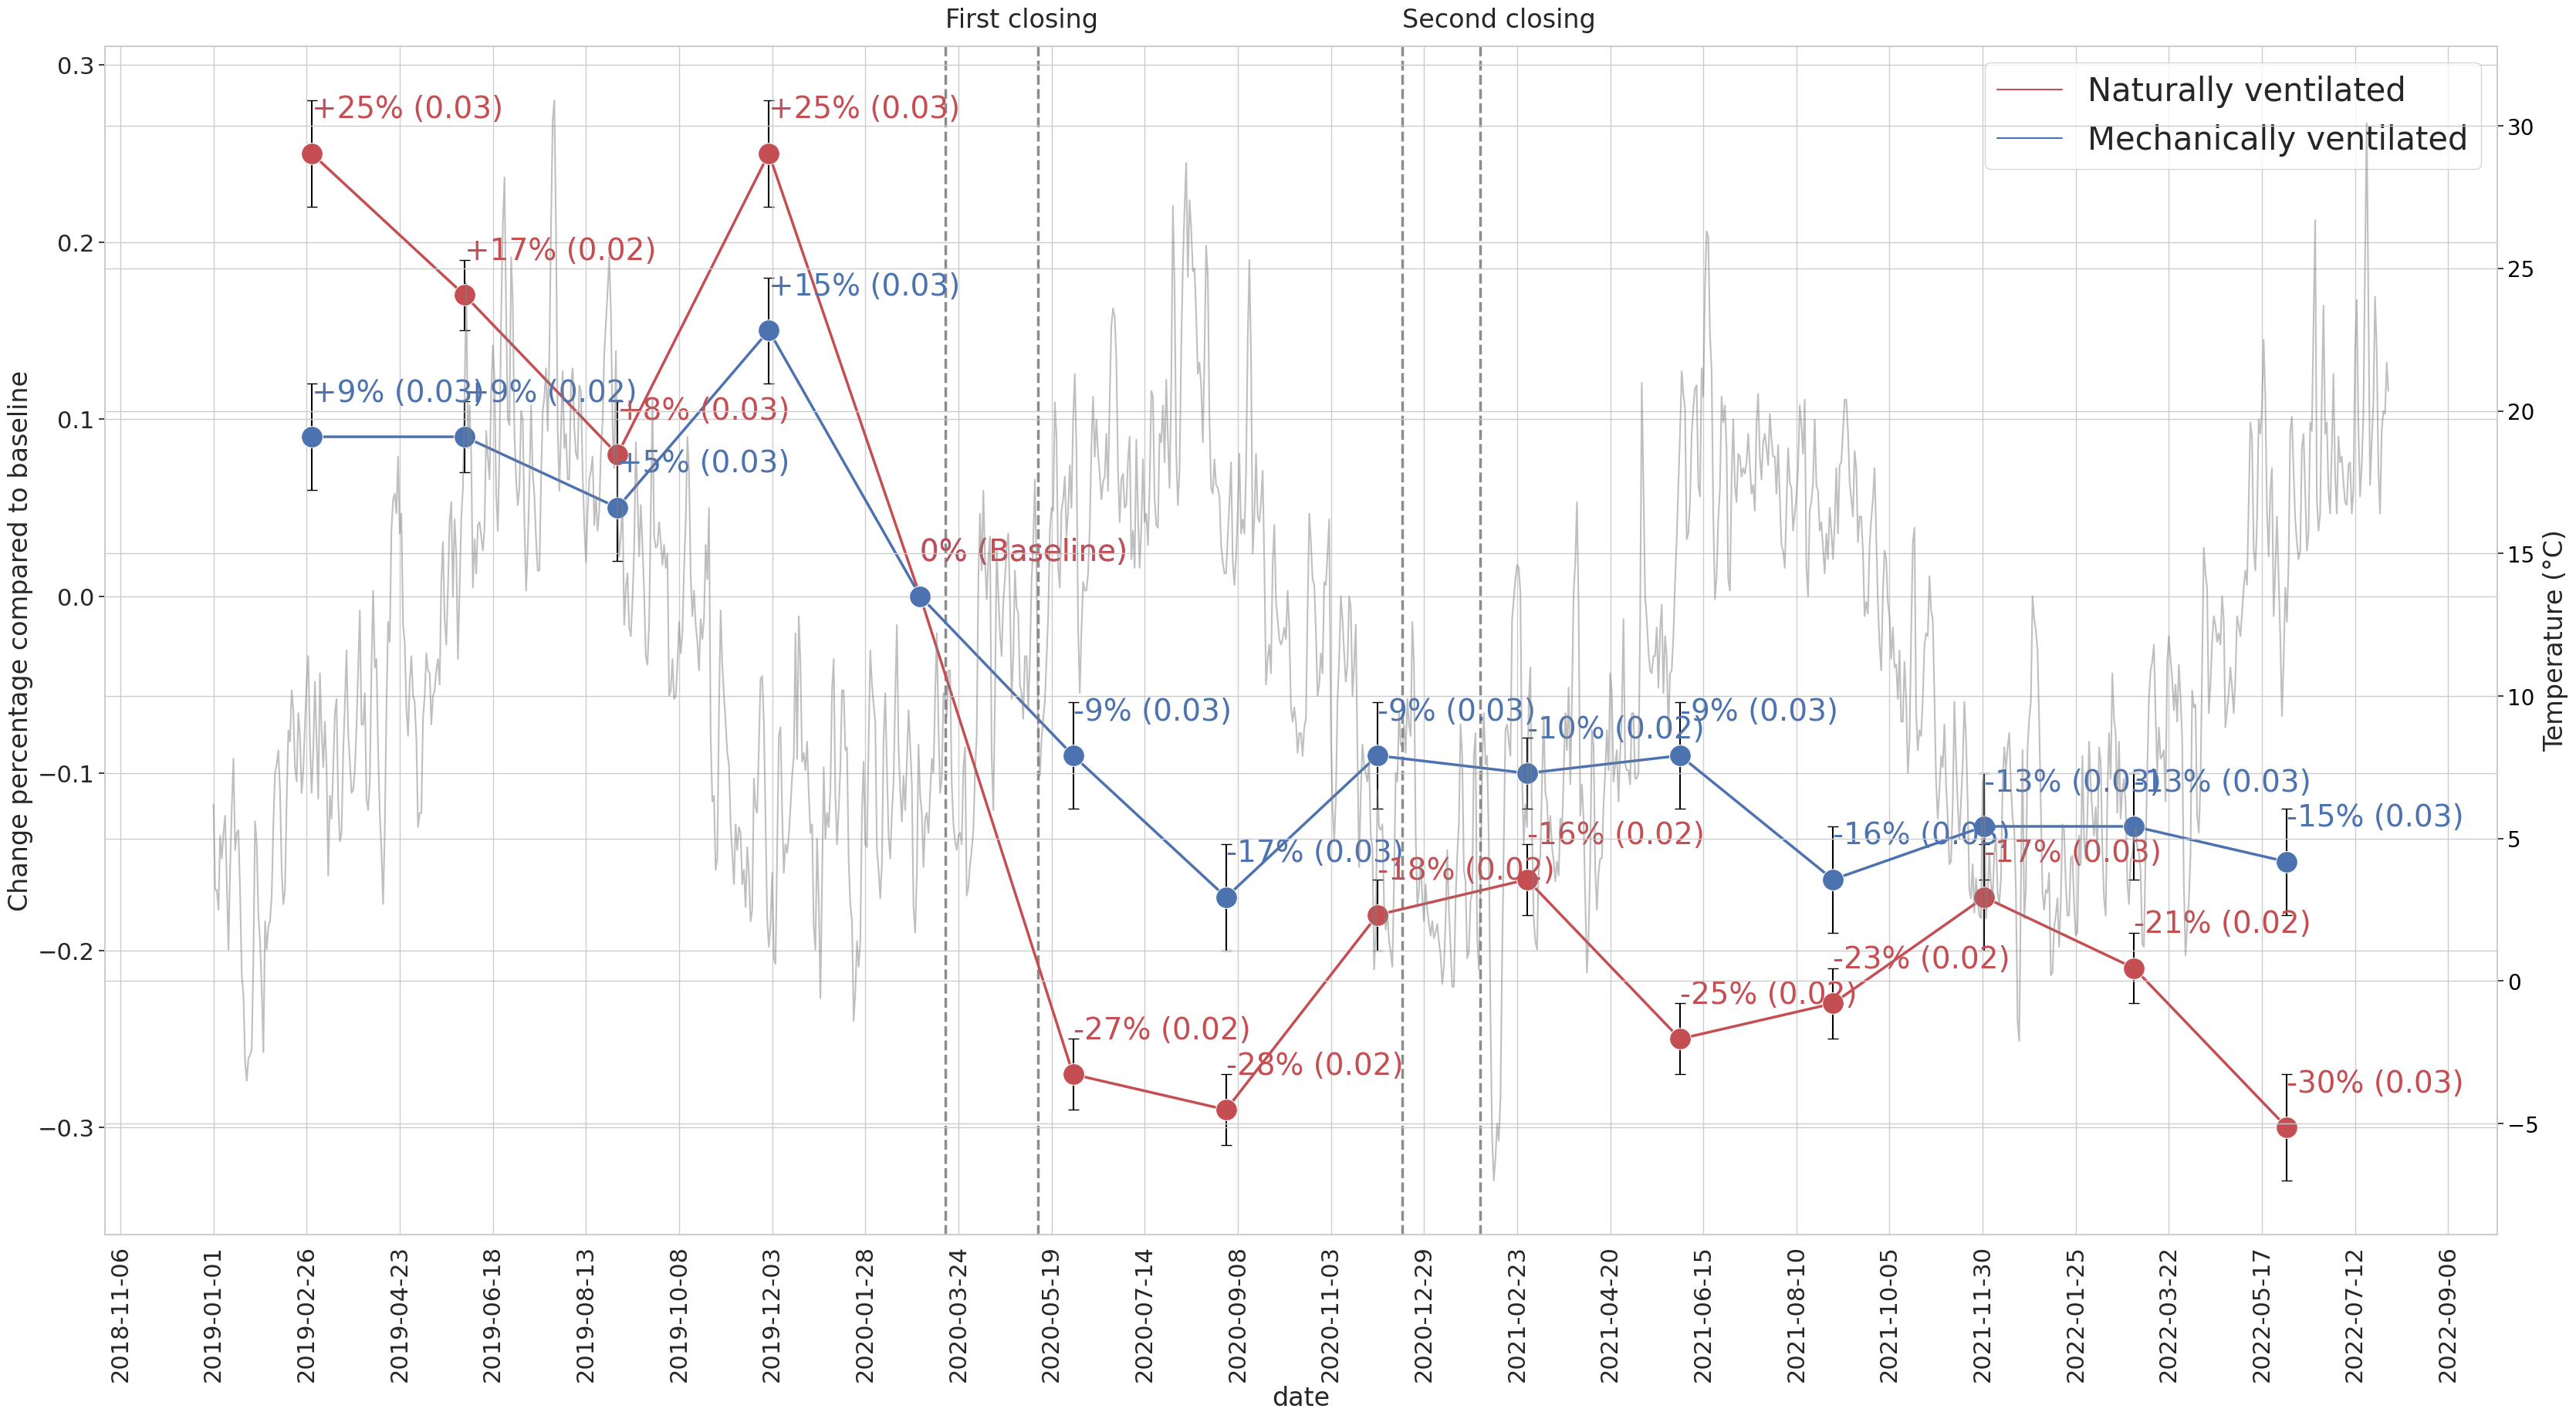

In [ ]:
import matplotlib.dates as md
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
palette=['r','b']
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="date", y="percentage", hue="variable",data =df_plot_dynamic_m1, palette = palette,marker='o', markersize=20,linewidth=2.5,linestyle='-', err_style='bars', legend=True)

# Creating the secondary y-axis for temperatures
ax2 = ax.twinx()
ax2.set_ylabel('Temperature (°C)', fontsize=24)
ax2.plot(temperature_data["date"], temperature_data["temperature"], color='grey', alpha=0.5, linestyle='-')
# ax2.plot(weekly_df_temp["date"], weekly_df_temp["temperature"], color='grey', alpha=0.5, linestyle='-')

ax2.tick_params(axis='y', labelcolor='black', labelsize=20)


ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1,interval = 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
ax.xaxis.set_minor_locator(md.DayLocator(interval = 2))
# Add vertical lines to your plot
ax.axvline(pd.to_datetime(closing_1st), color='k', linestyle='--', linewidth=2.5, alpha=0.5, zorder=0)
ax.axvline(pd.to_datetime(reopen_1st), color='k', linestyle='--', linewidth=2.5, alpha=0.5, zorder=0)
ax.axvline(pd.to_datetime(closing_2nd), color='k', linestyle='--', linewidth=2.5, alpha=0.5, zorder=0)
ax.axvline(pd.to_datetime(reopen_2nd), color='k', linestyle='--', linewidth=2.5, alpha=0.5, zorder=0)

# Optionally, if you want to add labels to your vertical lines
ax.text(pd.to_datetime(closing_1st), ax.get_ylim()[1]+0.055, 'First closing', ha='left', va='top', fontsize=24)
# ax.text(pd.to_datetime(reopen_1st), ax.get_ylim()[1], 'First reopen', ha='left', va='bottom', fontsize=20)
ax.text(pd.to_datetime(closing_2nd), ax.get_ylim()[1]+0.055, 'Second closing', ha='left', va='top', fontsize=24)
# ax.text(pd.to_datetime(reopen_2nd), ax.get_ylim()[1], 'Secnond reopen', ha='left', va='bottom', fontsize=20)
# ax.set(xticklabels = df_plot_dynamic_m1['date'])
for x, y, yerr in zip(df_plot_dynamic_m1["date"], df_plot_dynamic_m1["percentage"], df_plot_dynamic_m1["std_dev"]):
    ax.errorbar(x, y, yerr=yerr, color='black', fmt='o', markersize=5, capsize=5,zorder=0)

# Add the text with percentage and std_dev
for (label, item), color in zip(df_plot_dynamic_m1.groupby('variable'), sns.color_palette(palette)[::-1]):
    # item is a grouped data frame
    for x, y, m in item[["date", "percentage", 'value']].values:
        percentage, std_dev = m

        # Format the percentage with '+' for positive values and add the standard deviation
        text_value = (f'+{int(100*percentage)}%' if percentage > 0 else f'{int(100*percentage)}%') + f' ({std_dev})'

        ax.text(x, y+0.02, text_value, color=color, size=28)  # Adjusted size for visibility



# Rename the y axis
ax.set_ylabel("Change percentage compared to baseline")

# Add the legend
ax.legend(title="", loc="upper right",fontsize=30)
# desired_title_font_size = 26
# desired_label_font_size = 24
# ax.legend().set_title("Ventilation Type", prop=dict(size=desired_title_font_size))

ax.get_figure().savefig("high_quality_plot.png", dpi=300)

In [ ]:
# @title Dymamic model include before COVID
# real dynamic effect model

# df_c1.columns
def get_period(num_month, n, prefix):
    if num_month >= 0:
        return prefix + str(num_month//n+1) + '_periods'
    else:
        return 'pre'

# def get_period_d(num_days, n, prefix):
#     if num_days >= 0:
#         return prefix + str(num_days//n+1) + '_periods'
#     else:
#         return 'pre'

df_c1['period_0']= df_c1['n_month_before_1st_closing'].apply(lambda x: get_period(x,3,'before_1st_'))
df_c1['period_1']= df_c1['n_month_after_1st_reopen'].apply(lambda x: get_period(x,3,'after_1st_'))
df_c1['period_2']= df_c1['n_month_after_2nd_reopen'].apply(lambda x: get_period(x,3,'after_2nd_'))


df_c1.loc[df_c1['date']>=pd.to_datetime(reopen_2nd),'period_1'] = df_c1.loc[df_c1['date']>=pd.to_datetime(reopen_2nd),'period_2']
# df_c1.loc[df_c1['date']<=pd.to_datetime(closing_1st),'period_1'] = df_c1.loc[df_c1['date']<=pd.to_datetime(closing_1st),'period_0']
# df_c1[['date','n_month_after_2nd_reopen','period_1']]
# df_c1[df_c1['date']==pd.to_datetime('2022-07-01')][['date','n_month_after_2nd_reopen','period_1']]


In [ ]:
df_period_dummy = pd.get_dummies(df_c1['period_1'])
df_period_dummy

,after_1st_1_periods,after_1st_2_periods,after_1st_3_periods,after_2nd_1_periods,after_2nd_2_periods,after_2nd_3_periods,after_2nd_4_periods,after_2nd_5_periods,after_2nd_6_periods,before_1st_1_periods,before_1st_2_periods,before_1st_3_periods,before_1st_4_periods,before_1st_5_periods
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104036,0,0,0,0,0,0,0,0,1,0,0,0,0,0
104037,0,0,0,0,0,0,0,0,1,0,0,0,0,0
104038,0,0,0,0,0,0,0,0,1,0,0,0,0,0
104039,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_period_dummy = pd.get_dummies(df_c1['period_1'])

df_period_ventilation_dummy =df_period_dummy.copy()


df_period_ventilation_dummy.loc[df_output1['ventilation_bi']==0, :]=0

df_period_ventilation_dummy.columns = ['Mech_'+str(x) for x in df_period_ventilation_dummy.columns.tolist() ]

df_dy = pd.concat([df_c1,df_period_dummy, df_period_ventilation_dummy], axis = 1)

df_dy.columns

Index(['date', 'co2_ppm_mean', 'co2_ppm_max', 'humidity_pct_mean',
       'humidity_pct_max', 'pn1plus_counts_per_l_mean',
       'pn1plus_counts_per_l_max', 'pressure_mbar_mean', 'pressure_mbar_max',
       'sound_dba_mean', 'sound_dba_max', 'temperature_deg_c_mean',
       'temperature_deg_c_max', 'node_id', 'schoolyear', 'town_code',
       'floor_num', 'group', 'num_stud', 'year', 'school_name', 'ventilation',
       'ventilation_bi', 'month', 'season', 'weekday', 'covid', 'holidays',
       'Reopen_Period_1', 'Reopen_Period_2', 'Before_Closing',
       'Mechanical_Reopen_Period_1', 'Mechanical_Reopen_Period_2',
       'Mechanical_Before_Closing', 'n_month_before_1st_closing',
       'n_month_after_1st_reopen', 'n_month_after_2nd_reopen', 'Period',
       'Observation Period', 'Ventilation Type', 'Mechanical_1st_reopen',
       'Mechanical_2nd_reopen', 'Mechanical_Before_closing', 'temp_seg',
       'num_stud_standard', 'period_0', 'period_1', 'period_2',
       'after_1st_1_period

In [ ]:
dummies = ['before_1st_5_periods',\
           'before_1st_4_periods','before_1st_3_periods','before_1st_2_periods','before_1st_1_periods',\
           'after_1st_1_periods', 'after_1st_2_periods', 'after_1st_3_periods','after_2nd_1_periods', 'after_2nd_2_periods', \
           'after_2nd_3_periods', 'after_2nd_4_periods', 'after_2nd_5_periods', 'after_2nd_6_periods',\
           'Mech_before_1st_5_periods',\
           'Mech_before_1st_4_periods', 'Mech_before_1st_3_periods',\
           'Mech_before_1st_2_periods', 'Mech_before_1st_1_periods',\
           'Mech_after_1st_1_periods', 'Mech_after_1st_2_periods','Mech_after_1st_3_periods', 'Mech_after_2nd_1_periods',\
           'Mech_after_2nd_2_periods', 'Mech_after_2nd_3_periods', 'Mech_after_2nd_4_periods', 'Mech_after_2nd_5_periods','Mech_after_2nd_6_periods']



formula1da = ('np.log(co2_ppm_mean) ~ {0}  + num_stud + C(node_id)+ C(season)'.format('+'.join(['C({0})'.format(str) for str in dummies])))

reg_co2_1da = sm.ols(formula=formula1da, data=df_dy).fit(cov_type='cluster', cov_kwds={'groups': df_dy['node_id']})

features_sel = ['C({0})[T.1]'.format(str) for str in dummies]
reg_co2_1da.params[features_sel]

df_params = pd.DataFrame(reg_co2_1da.params[features_sel]).reset_index()
df_params.columns = ['n_period','coef']



,n_period,coef
0,C(before_1st_5_periods)[T.1],0.698949
1,C(before_1st_4_periods)[T.1],0.582095
2,C(before_1st_3_periods)[T.1],0.462360
3,C(before_1st_2_periods)[T.1],0.659572
4,C(before_1st_1_periods)[T.1],0.647394
5,C(after_1st_1_periods)[T.1],0.316706
6,C(after_1st_2_periods)[T.1],0.314259
7,C(after_1st_3_periods)[T.1],0.434960
8,C(after_2nd_1_periods)[T.1],0.459486
9,C(after_2nd_2_periods)[T.1],0.335544


In [ ]:
df_plot_dynamic = pd.DataFrame()
k = 14
df_plot_dynamic['coef'] = df_params['coef'][:k].values
# df_plot_dynamic['Daily average CO2 change'] = df_params['coef'][:k].values + 1


# now they are percentage. let's make them absolute value compared to 1
df_plot_dynamic['Daily average CO2'] = df_plot_dynamic['coef']
# df_plot_dynamic.loc[0,'Daily average CO2 with mechanical ventilation'] = df_params['coef'][k]+1
df_plot_dynamic['coef_mec'] = df_params['coef'][k:].values
# df_plot_dynamic['Daily average CO2 change with mechanical ventilation'] = df_params['coef'][k:].values + 1
df_plot_dynamic['Daily average CO2 with mechanical ventilation'] = df_plot_dynamic['coef_mec'] + df_plot_dynamic['Daily average CO2']

# df_plot_dynamic['Daily peak CO2 change with mechanical ventilation'] =  reg_co2_2da.params[features_sel][k:].values
df_plot_dynamic['date'] = ['2019-03-16','2019-06-16','2019-09-16','2019-12-16','2020-03-12','2020-05-12','2020-08-12','2020-11-12','2021-02-09','2021-05-09','2021-08-09','2021-11-09','2022-02-09','2022-05-09']
df_plot_dynamic['date'] = pd.to_datetime(df_plot_dynamic['date'])
# df_plot_dynamic = df_plot_dynamic[df_plot_dynamic.columns[1:]]

# df_plot_dynamic.columns
df_plot_dynamic_avg = df_plot_dynamic[['date','Daily average CO2','Daily average CO2 with mechanical ventilation']]
df_plot_dynamic_avg_coef = df_plot_dynamic[['date','coef','coef_mec']]
# df_plot_dynamic_max = df_plot_dynamic[['date','Daily peak CO2 change','Daily peak CO2 change with mechanical ventilation']]

df_plot_dynamic_m1 = df_plot_dynamic_avg.melt(id_vars = ['date'],ignore_index=True)

df_plot_dynamic_m2 = df_plot_dynamic_avg_coef.melt(id_vars = ['date'],ignore_index=True)
# df_plot_dynamic

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


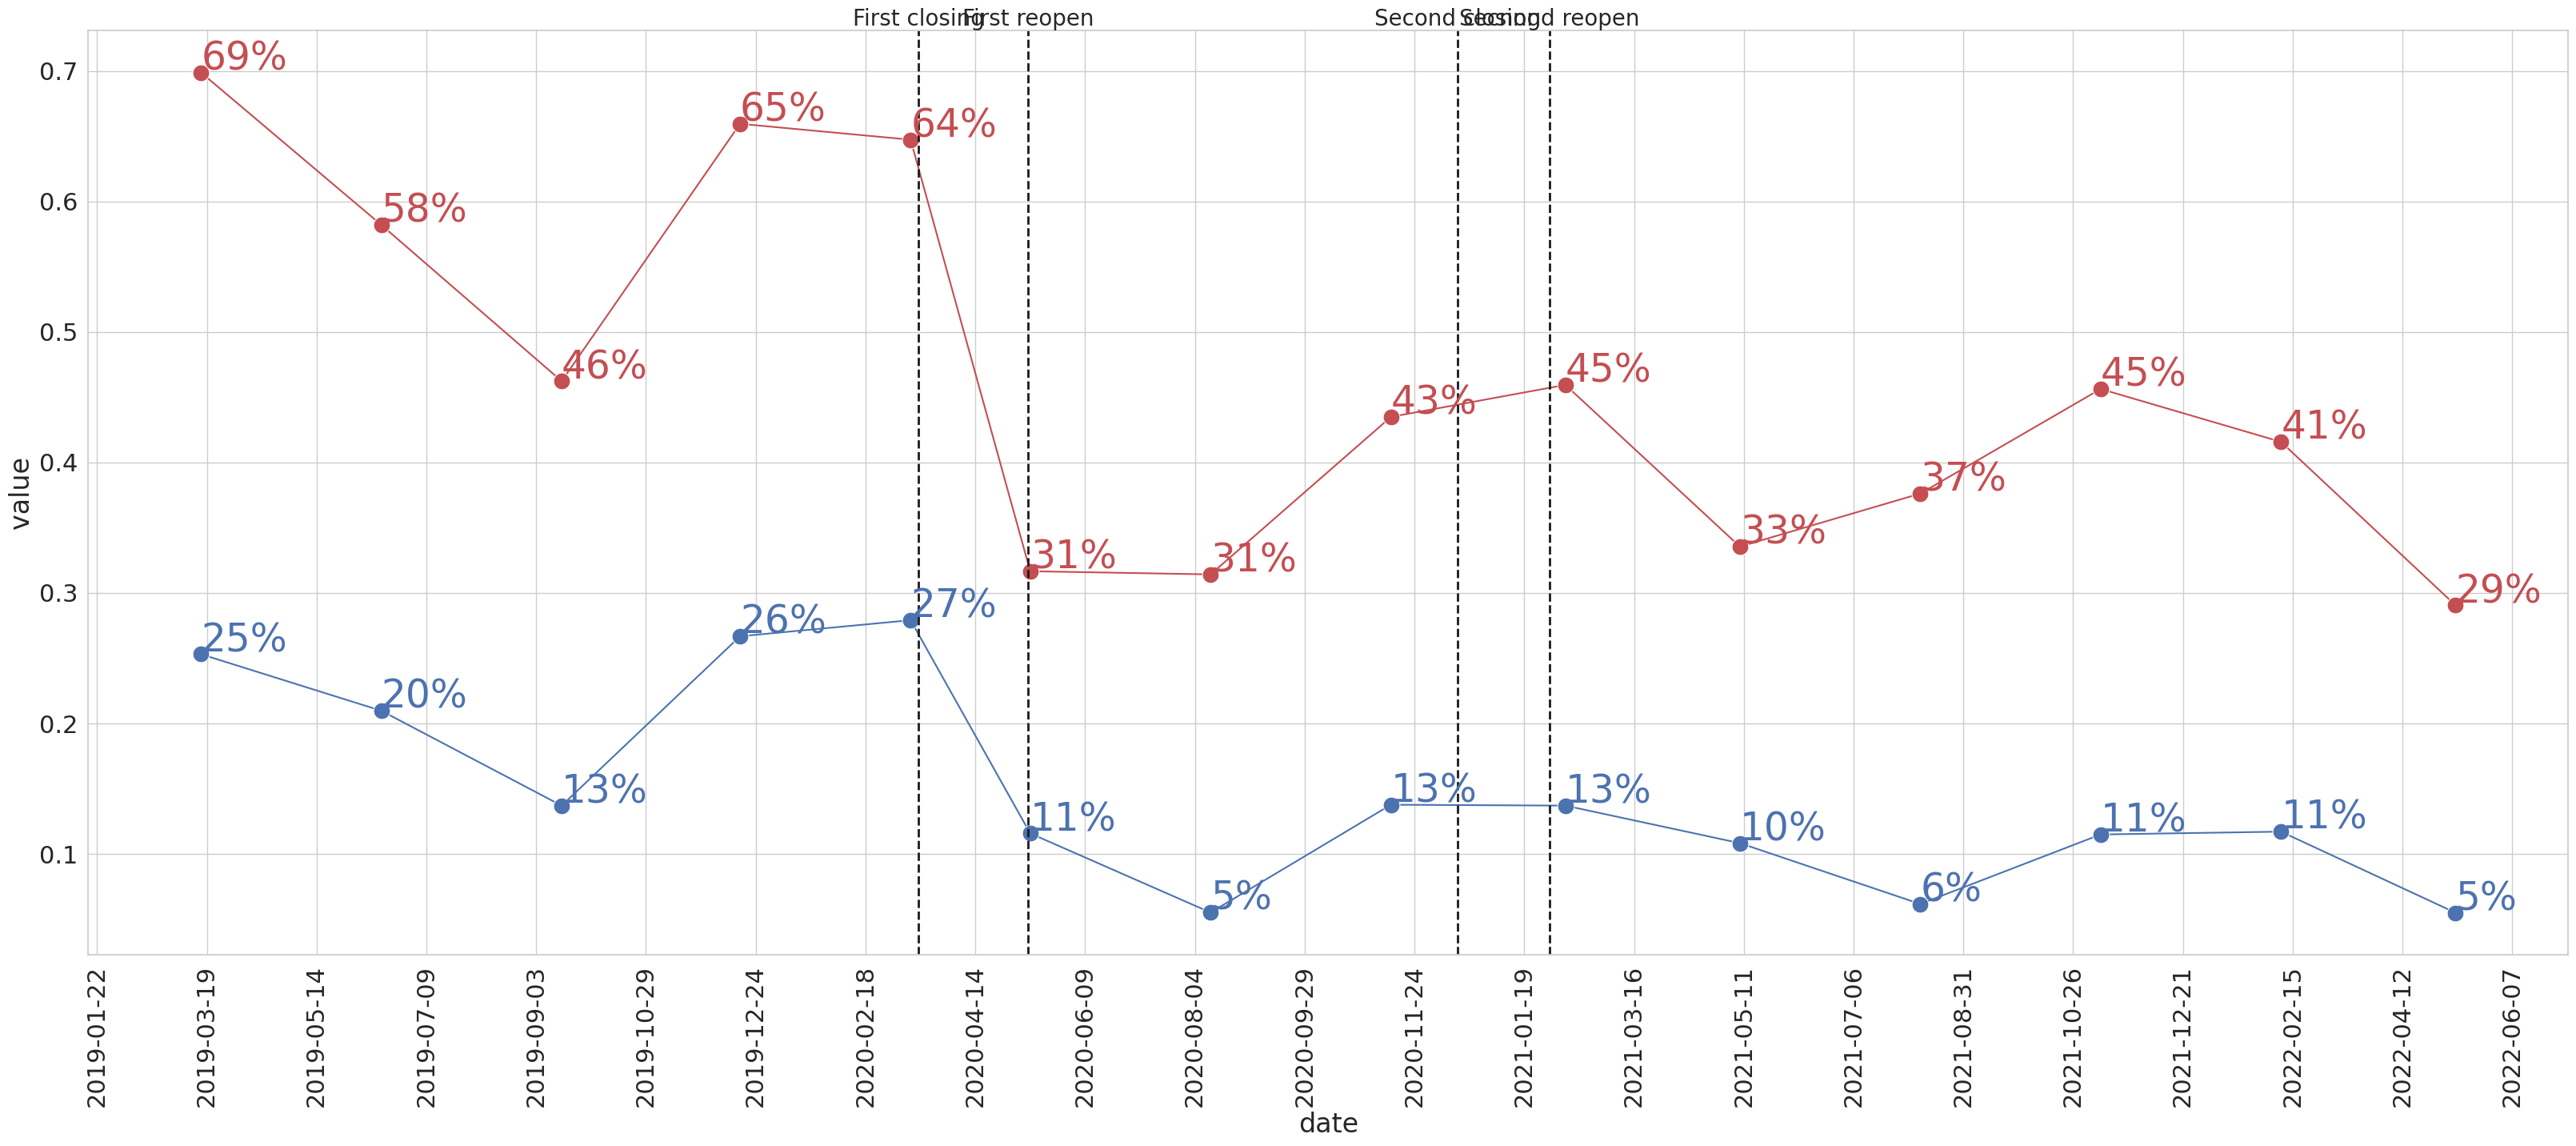

In [ ]:
import matplotlib.dates as md
sns.set(rc={'figure.figsize':(40,15)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
palette=['r','b']
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="date", y="value", hue="variable",data =df_plot_dynamic_m1, palette = palette,marker='o', markersize=15,legend=False,linestyle='-', err_style='bars')
# ax = sns.pointplot(x="date", y="value", hue="variable",data =df_plot_dynamic_m1, palette = palette,join=False, markersize=15,legend=False)
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1,interval = 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
ax.xaxis.set_minor_locator(md.DayLocator(interval = 2))
# Add vertical lines to your plot
ax.axvline(pd.to_datetime(closing_1st), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(reopen_1st), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(closing_2nd), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(reopen_2nd), color='k', linestyle='--', linewidth=2)

# Optionally, if you want to add labels to your vertical lines
ax.text(pd.to_datetime(closing_1st), ax.get_ylim()[1], 'First closing', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(reopen_1st), ax.get_ylim()[1], 'First reopen', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(closing_2nd), ax.get_ylim()[1], 'Second closing', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(reopen_2nd), ax.get_ylim()[1], 'Secnond reopen', ha='center', va='bottom', fontsize=20)

# ax.set(xticklabels = df_plot_dynamic_m1['date'])
for item, color in zip(df_plot_dynamic_m1.groupby('variable'), palette):
    #item[1] is a grouped data frame
    for x,y,m in item[1][["date","value",'value']].values:
        ax.text(x,y+0.002,f'{int(100 * m)}%',color=color, size = 35)

In [ ]:



dummies = [#'before_1st_5_periods',\
           'before_1st_4_periods','before_1st_3_periods','before_1st_2_periods','before_1st_1_periods',\
           'after_1st_1_periods', 'after_1st_2_periods', 'after_1st_3_periods','after_2nd_1_periods', 'after_2nd_2_periods', \
           'after_2nd_3_periods', 'after_2nd_4_periods', 'after_2nd_5_periods', 'after_2nd_6_periods',\
           'Mech_before_1st_5_periods',\
           'Mech_before_1st_4_periods', 'Mech_before_1st_3_periods',\
           'Mech_before_1st_2_periods', 'Mech_before_1st_1_periods',\
           'Mech_after_1st_1_periods', 'Mech_after_1st_2_periods','Mech_after_1st_3_periods', 'Mech_after_2nd_1_periods',\
           'Mech_after_2nd_2_periods', 'Mech_after_2nd_3_periods', 'Mech_after_2nd_4_periods', 'Mech_after_2nd_5_periods','Mech_after_2nd_6_periods']


formula1da = ('np.log(co2_ppm_mean) ~ {0}  + num_stud + C(node_id)+ C(season)'.format('+'.join(['C({0})'.format(str) for str in dummies])))

reg_co2_1da = sm.ols(formula=formula1da, data=df_dy).fit(cov_type='cluster', cov_kwds={'groups': df_dy['node_id']})

features_sel = ['C({0})[T.1]'.format(str) for str in dummies]
reg_co2_1da.params[features_sel]

df_params = pd.DataFrame(reg_co2_1da.params[features_sel]).reset_index()
df_params.columns = ['n_period','coef']
base_row = pd.DataFrame({'n_period':['C(before_1st_5_periods)[T.1]'],'coef':[0]})
df_params = pd.concat([base_row, df_params]).reset_index(drop=True)

In [ ]:
################### output #####################################################

# stargazer = Stargazer([reg_co2_1d, reg_co2_1da, reg_co2_2d, reg_co2_2da])

# stargazer.covariate_order(features_sel)
# def pretty(str):
#     return str.replace('_',' ')
# stargazer.rename_covariates({x:pretty(x) for x in features_sel})

# stargazer.show_degrees_of_freedom(False)
# # stargazer.cov_names
# stargazer
# print(stargazer.render_latex())


df_plot_dynamic = pd.DataFrame()
k = 14
df_plot_dynamic['coef'] = df_params['coef'][:k].values
# df_plot_dynamic['Daily average CO2 change'] = df_params['coef'][:k].values + 1


# now they are percentage. let's make them absolute value compared to 1
df_plot_dynamic['Daily average CO2'] = df_plot_dynamic['coef']+1
# df_plot_dynamic.loc[0,'Daily average CO2 with mechanical ventilation'] = df_params['coef'][k]+1
df_plot_dynamic['coef_mec'] = df_params['coef'][k:].values
# df_plot_dynamic['Daily average CO2 change with mechanical ventilation'] = df_params['coef'][k:].values + 1
df_plot_dynamic['Daily average CO2 with mechanical ventilation'] = df_plot_dynamic['coef_mec']+1

# df_plot_dynamic['Daily peak CO2 change with mechanical ventilation'] =  reg_co2_2da.params[features_sel][k:].values
df_plot_dynamic['date'] = ['2019-03-16','2019-06-16','2019-09-16','2019-12-16','2020-03-12','2020-05-12','2020-08-12','2020-11-12','2021-02-09','2021-05-09','2021-08-09','2021-11-09','2022-02-09','2022-05-09']
df_plot_dynamic['date'] = pd.to_datetime(df_plot_dynamic['date'])
# df_plot_dynamic = df_plot_dynamic[df_plot_dynamic.columns[1:]]

# df_plot_dynamic.columns
df_plot_dynamic_avg = df_plot_dynamic[['date','Daily average CO2','Daily average CO2 with mechanical ventilation']]
df_plot_dynamic_avg_coef = df_plot_dynamic[['date','coef','coef_mec']]
# df_plot_dynamic_max = df_plot_dynamic[['date','Daily peak CO2 change','Daily peak CO2 change with mechanical ventilation']]

df_plot_dynamic_m2 = df_plot_dynamic_avg.melt(id_vars = ['date'],ignore_index=True)

df_plot_dynamic_m1 = df_plot_dynamic_avg_coef.melt(id_vars = ['date'],ignore_index=True)
df_plot_dynamic

,coef,Daily average CO2,coef_mec,Daily average CO2 with mechanical ventilation,date
0,0.000000,1.000000,-0.445827,0.554173,2019-03-16
1,-0.116853,0.883147,-0.372326,0.627674,2019-06-16
2,-0.236589,0.763411,-0.325312,0.674688,2019-09-16
3,-0.039377,0.960623,-0.392735,0.607265,2019-12-16
4,-0.051555,0.948445,-0.368225,0.631775,2020-03-12
5,-0.382243,0.617757,-0.200911,0.799089,2020-05-12
6,-0.384690,0.615310,-0.259123,0.740877,2020-08-12
7,-0.263989,0.736011,-0.297211,0.702789,2020-11-12
8,-0.239462,0.760538,-0.322421,0.677579,2021-02-09
9,-0.363405,0.636595,-0.227232,0.772768,2021-05-09


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


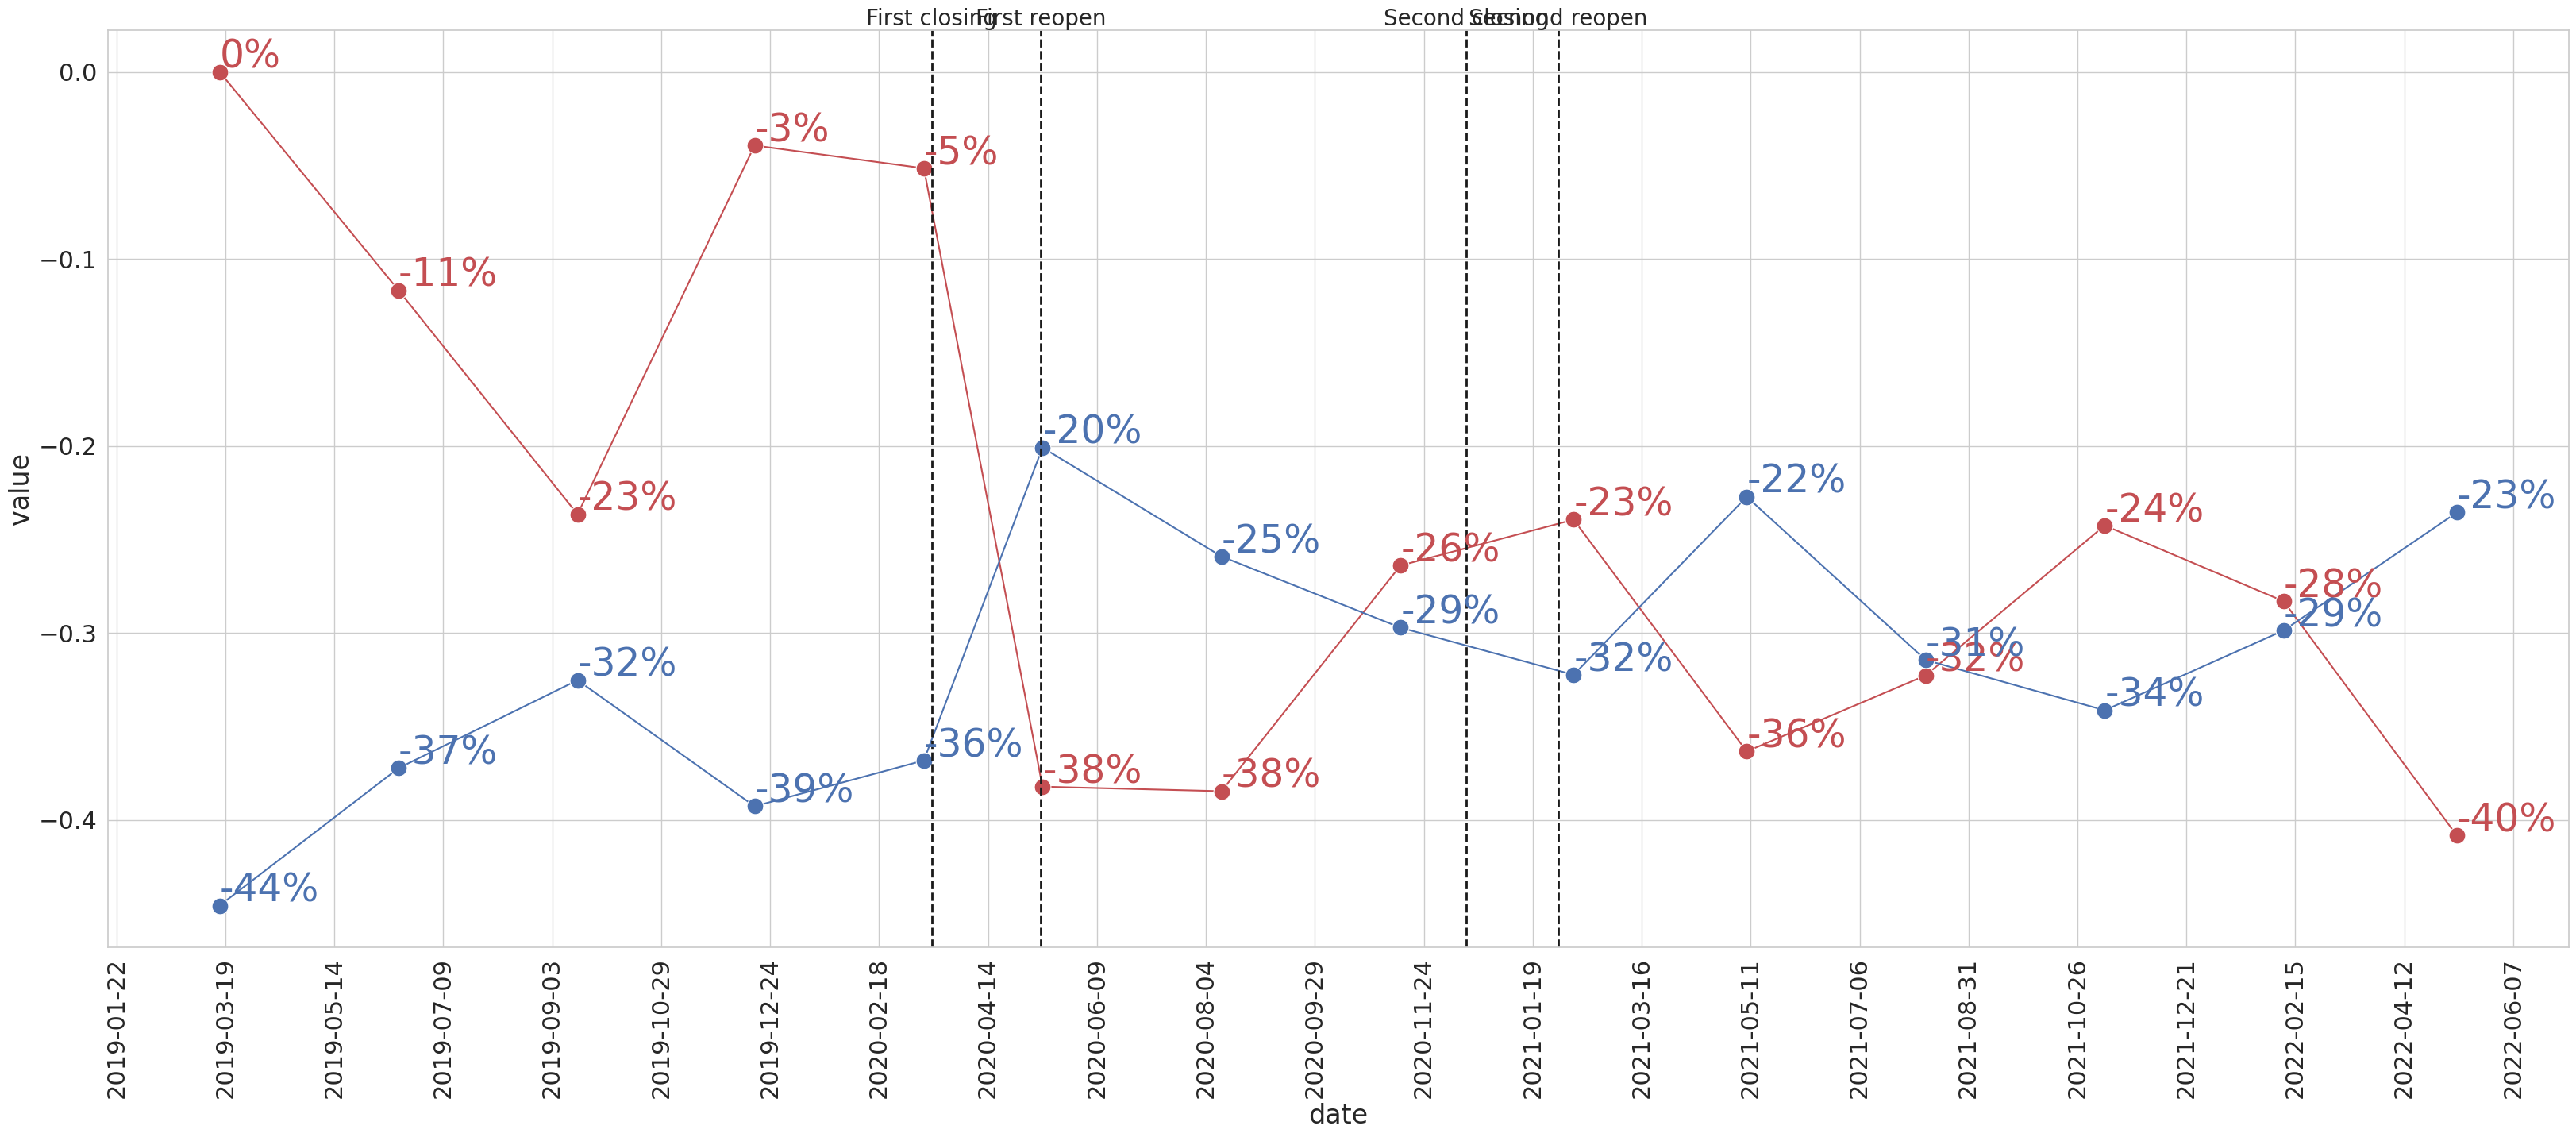

In [ ]:
import matplotlib.dates as md
sns.set(rc={'figure.figsize':(40,15)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
palette=['r','b']
fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="date", y="value", hue="variable",data =df_plot_dynamic_m1, palette = palette,marker='o', markersize=15,legend=False,linestyle='-', err_style='bars')
# ax = sns.pointplot(x="date", y="value", hue="variable",data =df_plot_dynamic_m1, palette = palette,join=False, markersize=15,legend=False)
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1,interval = 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
ax.xaxis.set_minor_locator(md.DayLocator(interval = 2))
# Add vertical lines to your plot
ax.axvline(pd.to_datetime(closing_1st), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(reopen_1st), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(closing_2nd), color='k', linestyle='--', linewidth=2)
ax.axvline(pd.to_datetime(reopen_2nd), color='k', linestyle='--', linewidth=2)

# Optionally, if you want to add labels to your vertical lines
ax.text(pd.to_datetime(closing_1st), ax.get_ylim()[1], 'First closing', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(reopen_1st), ax.get_ylim()[1], 'First reopen', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(closing_2nd), ax.get_ylim()[1], 'Second closing', ha='center', va='bottom', fontsize=20)
ax.text(pd.to_datetime(reopen_2nd), ax.get_ylim()[1], 'Secnond reopen', ha='center', va='bottom', fontsize=20)

# ax.set(xticklabels = df_plot_dynamic_m1['date'])
for item, color in zip(df_plot_dynamic_m1.groupby('variable'), palette):
    #item[1] is a grouped data frame
    for x,y,m in item[1][["date","value",'value']].values:
        ax.text(x,y+0.002,f'{int(100 * m)}%',color=color, size = 35)

In [ ]:
# @title Basic model and sensitivity analysis
